## GAN (Genrative Adversial Network):-


https://www.geeksforgeeks.org/generative-adversarial-network-gan/

![Screenshot 2024-05-06 130748.png](<attachment:Screenshot 2024-05-06 130748.png>)
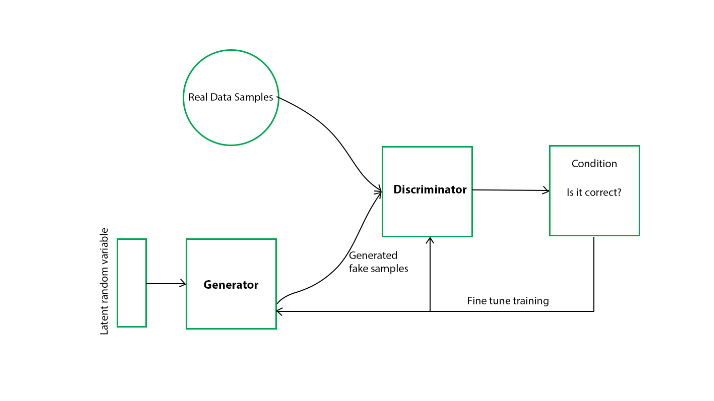

### Generative Adversarial Networks (GANs) are a powerful class of neural networks that are used for an unsupervised learning. GANs are made up of two neural networks, a discriminator and a generator. They use adversarial training to produce artificial data that is identical to actual data.

* The Generator attempts to fool the Discriminator, which is tasked with accurately distinguishing between produced and genuine data, by producing random noise samples.
* Realistic, high-quality samples are produced as a result of this competitive interaction, which drives both networks toward advancement.
* GANs are proving to be highly versatile artificial intelligence tools, as evidenced by their extensive use in image synthesis, style transfer, and text-to-image synthesis.
* They have also revolutionized generative modeling.

## What is a Generative Adversarial Network?
### Generative Adversarial Networks (GANs) are a powerful class of neural networks that are used for an `unsupervised learning`. GANs are made up of two `neural networks`, a `discriminator` and a `generator`. They use `adversarial training` to produce artificial data that is identical to actual data.

* The Generator attempts to fool the Discriminator, which is tasked with accurately distinguishing between produced and genuine data, by producing random noise samples.
* Realistic, high-quality samples are produced as a result of this competitive interaction, which drives both networks toward advancement.
* GANs are proving to be highly versatile artificial intelligence tools, as evidenced by their extensive use in image synthesis, style transfer, and text-to-image synthesis.
* They have also revolutionized generative modeling.

### Through adversarial training, these models engage in a competitive interplay until the generator becomes adept at creating realistic samples, fooling the discriminator approximately half the time.

### Generative Adversarial Networks (GANs) can be broken down into three parts:

* `Generative:` To learn a generative model, which describes how data is generated in terms of a probabilistic model.
* `Adversarial:` The word adversarial refers to setting one thing up against another. This means that, in the context of GANs, the generative result is compared with the actual images in the data set. A mechanism known as a discriminator is used to apply a model that attempts to distinguish between real and fake images.
* `Networks:` Use deep neural networks as artificial intelligence (AI) algorithms for training purposes.


![Screenshot 2024-05-06 131300.png](<attachment:Screenshot 2024-05-06 131300.png>)
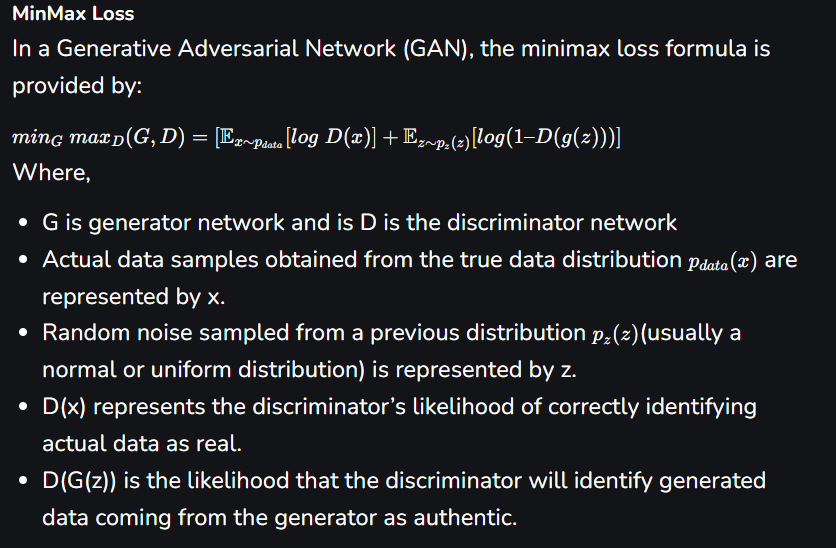

# DC-GAN:-
### Deep Convolutional Generative Adversarial Network

https://www.tensorflow.org/tutorials/generative/dcgan

Deep Convolutional GAN (DCGAN) was proposed by a researcher from MIT and Facebook AI research. It is widely used in many convolution-based generation-based techniques. The focus of this paper was to make training GANs stable. Hence, they proposed some architectural changes in the computer vision problems. In this article, we will be using DCGAN on the fashion MNIST dataset to generate images related to clothes.



### Need for DCGANs:

DCGANs are introduced to reduce the problem of mode collapse. Mode collapse occurs when the generator got biased towards a few outputs and can’t able to produce outputs of every variation from the dataset. For example- take the case of mnist digits dataset (digits from 0 to 9) , we want the generator should generate all type of digits but sometimes our generator got biased towards two to three digits and produce them only. Because of that the discriminator also got optimized towards that particular digits only, and this state is known as mode collapse. But this problem can be overcome by using DCGANs.

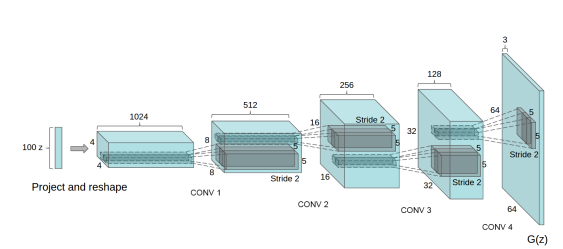

The generator of the DCGAN architecture takes 100 uniform generated values using normal distribution as an input. First, it changes the dimension to 4x4x1024 and performed a fractionally stridden convolution 4 times with a stride of 1/2 (this means every time when applied, it doubles the image dimension while reducing the number of output channels). The generated output has dimensions of (64, 64, 3). There are some architectural changes proposed in the generator such as the removal of all fully connected layers, and the use of Batch Normalization which helps in stabilizing training.  In this paper, the authors use ReLU activation function in all layers of the generator, except for the output layers. We will be implementing generator with similar guidelines but not completely the same architecture.

The role of the discriminator here is to determine that the image comes from either a real dataset or a generator. The discriminator can be simply designed similar to a convolution neural network that performs an image classification task. However, the authors of this paper suggested some changes in the discriminator architecture. Instead of fully connected layers, they used only strided-convolutions with LeakyReLU as an activation function, the input of the generator is a single image from the dataset or generated image and the output is a score that determines whether the image is real or generated.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display

# Check tensorflow version
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.16.1


In [4]:
# pip install tqdm

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

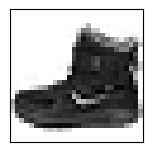

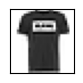

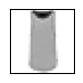

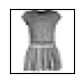

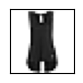

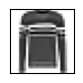

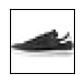

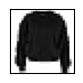

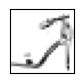

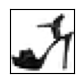

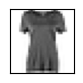

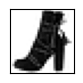

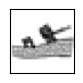

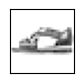

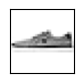

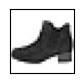

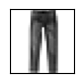

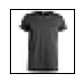

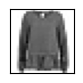

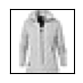

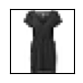

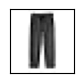

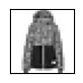

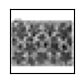

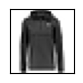

In [7]:
plt.figure(figsize =(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.show()
batch_size = 32
# This dataset fills a buffer with buffer_size elements,
# then randomly samples elements from this buffer, 
# replacing the selected elements with new elements.
def create_batch(x_train):
  dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)
  # Combines consecutive elements of this dataset into batches.
 
  dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)
  # Creates a Dataset that prefetches elements from this dataset
  return dataset

In [9]:
num_features = 100
 
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape =[num_features]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(
        64, (5, 5), (2, 2), padding ="same", activation ="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(
        1, (5, 5), (2, 2), padding ="same", activation ="tanh"),
])
generator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 14, 14, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │         1,601 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,705 (3.21 MB)

 Trainable params: 840,321 (3.21 MB)

 Non-trainable params: 384 (1.50 KB)

In [11]:
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, (5, 5), (2, 2), padding ="same", input_shape =[28, 28, 1]),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (5, 5), (2, 2), padding ="same"),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation ='sigmoid')
])
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile discriminator using binary cross entropy loss and adam optimizer
discriminator.compile(loss ="binary_crossentropy", optimizer ="adam")
# make  discriminator no-trainable as of  now
discriminator.trainable = False
# Combine both generator and discriminator
gan = keras.models.Sequential([generator, discriminator])
# compile generator using binary cross entropy loss and adam optimizer
 
gan.compile(loss ="binary_crossentropy", optimizer ="adam")

In [13]:
seed = tf.random.normal(shape =[batch_size, 100])
 
def train_dcgan(gan, dataset, batch_size, num_features, epochs = 5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print()
        print("Epoch {}/{}".format(epoch + 1, epochs))
 
        for X_batch in dataset:
            # create a random noise of sizebatch_size * 100
            # to passit into the generator
            noise = tf.random.normal(shape =[batch_size, num_features])
            generated_images = generator(noise)
 
            # take batch of generated image and real image and
            #  use them to train  the discriminator
            X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
 
            # Here we will be training our GAN model, in this step
            #  we pass noise that uses generatortogenerate the image
            #  and pass it with labels as [1] So, it can fool the discriminator
            noise = tf.random.normal(shape =[batch_size, num_features])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
 
            # generate images for the GIF as we go
            generate_and_save_images(generator, epoch + 1, seed)
 
    generate_and_save_images(generator, epochs, seed)

In [16]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training = False)

    fig = plt.figure(figsize =(10, 10))

    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap ='binary')
        plt.axis('off')

    plt.savefig('image_epoch_{:04d}.png'.format(epoch))

In [17]:
# reshape to add a color map
x_train_dcgan = x_train.reshape(-1, 28, 28, 1) * 2. - 1.
# create batches
dataset = create_batch(x_train_dcgan)
# callthe training function with 10 epochs and record time %% time
train_dcgan(gan, dataset, batch_size, num_features, epochs = 10)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1/10


C:\Users\Abhi\AppData\Local\Temp\ipykernel_12884\1472117975.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize =(10, 10))


In [ ]:
import imageio
import glob

anim_file = 'dcgan_results.gif'

with imageio.get_writer(anim_file, mode ='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
display.Image(filename = anim_file)

## Results and Conclusion:

```
To evaluate the quality of the representations learned by DCGANs for supervised tasks, the authors train the model on ImageNet-1k and then use the discriminator’s convolution features from all layers, max-pooling each layer’s representation to produce a 4 × 4 spatial grid. These features are then flattened and concatenated to form a 28672-dimensional vector and a regularized linear L2-SVM classifier is trained on top of them.  This model is then evaluated on CIFAR-10 dataset but not trained on it. The model reported an accuracy of 82 % which also displays the robustness of the model.



## STYLE GAN:-

## Research Paper:-
https://arxiv.org/abs/1812.04948

https://www.geeksforgeeks.org/stylegan-style-generative-adversarial-networks/

Generative Adversarial Networks (GAN) was proposed by Ian Goodfellow in 2014. Since its inception, there are a lot of improvements are proposed which made it a state-of-the-art method generate synthetic data including synthetic images. However most of these improvements made on the discriminator part of the model which refines the generation ability of generator. This also implies that there was not much focus on the generator part which causes the lack of control over the generator part of GAN. There are some parameters that can be changed during the generation part such as background, foreground and style or for human faces there are many features that can be altered in the generation of various images such pose, hair color, eyes color etc.

## Architecture:-
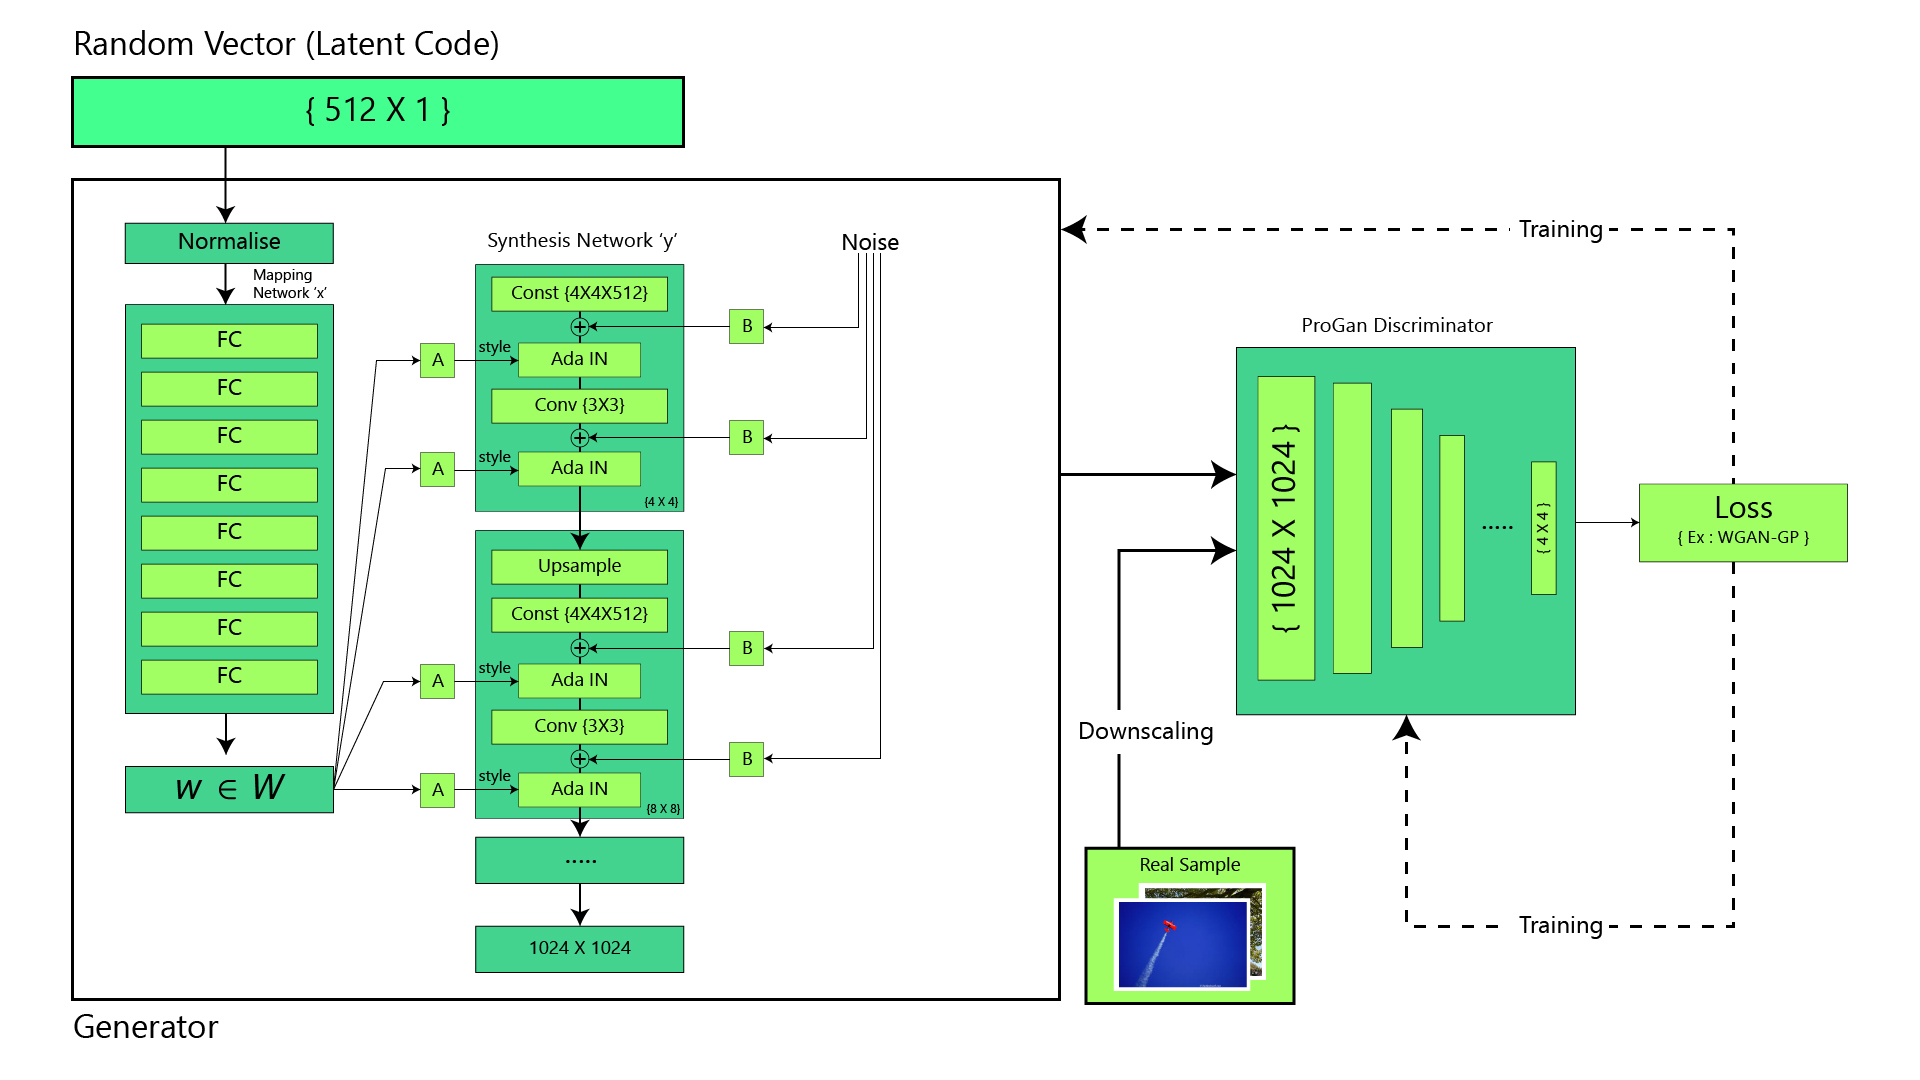

## Baseline Progressive Growing GANs:-
```
Style GAN uses baseline progressive GAN architecture which means the size of generated image increases gradually from a very low resolution (4×4) to high resolution (1024 x1024). This is done by adding a new block to both the models to support the larger resolution after fitting the model on smaller resolution to make it more stable..

## Bi-linear Sampling:-
```
The authors of paper uses bi-linear sampling instead of nearest neighbor up/down sampling (which was used in previous Baseline Progressive GAN architectures) in both generator and discriminator. They implement this bi-linear sampling by low pass filtering the activation with a separable 2nd order binomial filter after each of the upsampling layer and before each of the downsampling layer.


### Mapping Network and Style Network:-
```
The goal of the mapping network is to generate the input latent vector into the intermediate vector whose different element control different visual features. Instead of directly providing latent vector to input layer the mapping is used. In this paper, the latent vector (z) of size 512 is mapped to another vector of 512 (w). The mapping function is implemented using 8-layer MLP (8- fully connected layers).  The output of mapping network (w) then passed through a learned affine transformation (A) before passing into the synthesis network which AdaIN (Adaptive Instance Normalization) module. This model converts the encoded mapping into the generated image.


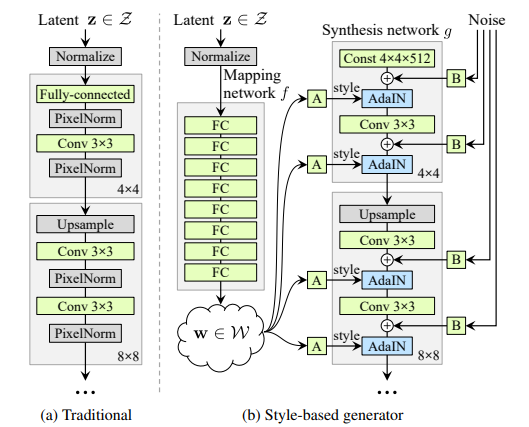

The input to the AdaIN is y = (ys, yb) which is generated by applying (A) to (w). The AdaIN operation is defined by the following equation:


![Screenshot 2024-05-06 135012.png](<attachment:Screenshot 2024-05-06 135012.png>)
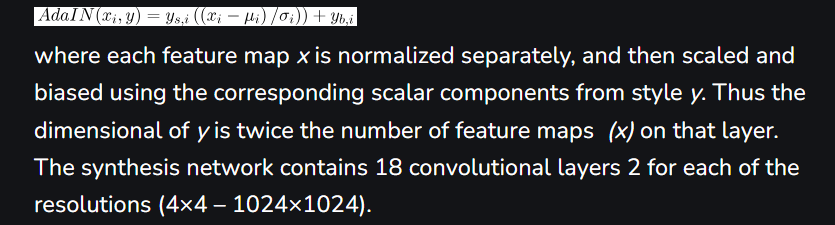

### * Removing traditional (Latent) input:-
Most previous style transfer model uses the random input to create the initial latent code of the generator i.e. the input of the 4×4 level. However the style-GAN authors concluded that the image generation features are controlled by w and  AdaIN. Therefore they replace the initial input with the constant matrix of 4x4x512. This also contributed to increase in the performance of the network.


### * Addition of Noisy:-
Input  A Gaussian noise (represented by B) is added to each of these activation maps before the AdaIN operations. A different sample of noise is generated for each block and is interpreted on the basis of scaling factors of that  layer.
There are many aspects in people’s faces that are small and can be seen as stochastic, such as freckles, exact placement of hairs, wrinkles, features which make the image more realistic and increase the variety of outputs. The common method to insert these small features into GAN images is adding random noise to the input vector


### * Mixing Regularization:-
The Style generation used intermediate vector at each level of synthesis network which may cause network to learn correlation between different levels. In order to reduce the correlation, the model randomly selects two input vectors (z1 and z2) and generates the intermediate vector (w1 and w2) for them. It then trains some of the levels with the first and switches (in a random split point) to the other to train the rest of the levels. This switch in random split points ensures that network don’t learn correlation very much.

![Screenshot 2024-05-06 135218.png](<attachment:Screenshot 2024-05-06 135218.png>)
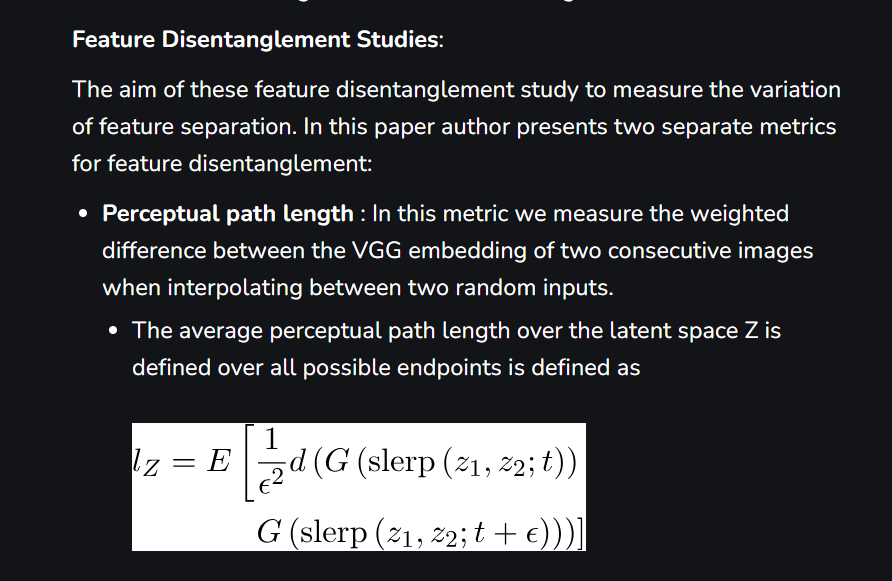

where z1, z2 ? P(z), t ? U(0, 1), G is the generator (i.e., g ?f for style-based networks), and d(·, ·) evaluates the perceptual distance between the resulting images. Here slerp stands for spherical Interpolation. Drastic changes in perceptual distance means that multiple features have changed together and that they might be entangled
Linear separability: In this method we look at how well the latent-space points can be separated into two distinct sets via a linear hyperplane, so that each set corresponds to a specific binary attribute of the image. For Example Each of the face images belong to either male or female.


## **W(Wasserstein ) GAN:-**

https://en.wikipedia.org/wiki/Wasserstein_GAN

WGAN’s architecture uses deep neural networks for both generator and discriminator. The key difference between GANs and WGANs is the loss function and the gradient penalty. WGANs were introduced as the solution to mode collapse issues. The network uses the Wasserstein distance, which provides a meaningful and smoother measure of distance between distributions.

## Wasserstein GAN Algorithm
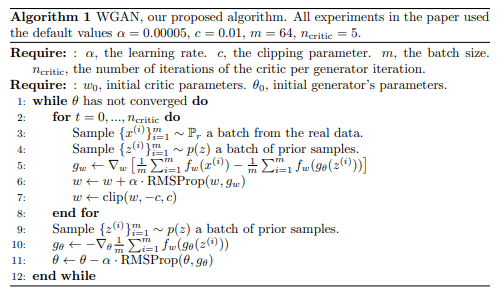

* The function f solves the maximization problem given by the Kantorovich-Rubinstein duality. To approximate it, a neural network is trained parametrized with weights w lying in a compact space W and then backprop as a typical GAN.
* To have parameters w lie in a compact space, we clamp the weights to a fixed box. Weight clipping is although terrible, yields good results when experimenting. It is simpler and hence implemented. EM distance is continuous and differentiable allows to train the critic till optimality.
* The JS gradient is stuck at local minima but the constrain of weight limits allows the possible growth of the function to be linear in most parts and get optimal critic.
* Since the optimal generator for a fixed discriminator is a sum of deltas on the places the discriminator assigns the greatest values to, we train the critic until optimality prevents modes from collapsing.
* It is obvious that the loss function at this stage is an estimate of the EM distance, as the critic f in the for loop lines indicates, prior to each generator update. Thus, it makes it possible for GAN literature to correlate based on the generated samples’ visual quality.
* This makes it very convenient to identify failure modes and learn which models perform better than others without having to look at the generated samples.

In [ ]:
from numpy import expand_dims
from numpy import mean
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras import backend
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.constraints import Constraint
from matplotlib import pyplot

In [ ]:
def wasserstein_loss(y_true, y_pred):
    	return backend.mean(y_true * y_pred)


In [ ]:
# load images from the dataset
def load_real_samples():
	(trainX, trainy), (_, _) = load_data()
	selected_ix = trainy == 5
	X = trainX[selected_ix]
	X = expand_dims(X, axis=-1)
	X = X.astype('float32')
	X = (X - 127.5) / 127.5
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = -ones((n_samples, 1))
	return X, y


In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = -ones((n_samples, 1))
	return X, y


In [ ]:
# clip model
class ClipConstraint(Constraint):
	def __init__(self, clip_value):
		self.clip_value = clip_value
	def __call__(self, weights):
		return backend.clip(weights, -self.clip_value, self.clip_value)


In [ ]:
# critic model
def define_critic(in_shape=(28,28,1)):
	init = RandomNormal(stddev=0.02)
	const = ClipConstraint(0.01)
	model = Sequential()
	model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init, kernel_constraint=const, input_shape=in_shape))
	model.add(BatchNormalization())
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init, kernel_constraint=const))
	model.add(BatchNormalization())
	model.add(LeakyReLU(alpha=0.2))
	model.add(Flatten())
	model.add(Dense(1))
	opt = RMSprop(lr=0.00005)
	model.compile(loss=wasserstein_loss, optimizer=opt)
	return model


In [ ]:
def define_generator(latent_dim):
    
	init = RandomNormal(stddev=0.03)
	# define model
	model = Sequential()
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, kernel_initializer=init, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init))
	model.add(BatchNormalization())
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init))
	model.add(BatchNormalization())
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same', kernel_initializer=init))
	return model


In [ ]:
def define_gan(generator, critic):
    	# make weights in the critic not trainable
	for layer in critic.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	model = Sequential()
	model.add(generator)
	model.add(critic)
	opt = RMSprop(lr=0.00005)
	model.compile(loss=wasserstein_loss, optimizer=opt)
	return model


In [ ]:
def generate_latent_points(latent_dim, n_samples):
    	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# fake examples
def generate_fake_samples(generator, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = generator.predict(x_input)
	y = ones((n_samples, 1))
	return X, y


In [ ]:
# train the generator and critic
def train(g_model, c_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=64, n_critic=5):
	# number of batches per training epoch
	bat_per_epo = int(dataset.shape[0] / n_batch)
	# number of training iterations
	n_steps = bat_per_epo * n_epochs
	# size of half a batch of samples
	half_batch = int(n_batch / 2)
	
	c1_hist, c2_hist, g_hist = list(), list(), list()

	for i in range(n_steps):
		# update the critic
		c1_tmp, c2_tmp = list(), list()
		for _ in range(n_critic):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			c_loss1 = c_model.train_on_batch(X_real, y_real)
			c1_tmp.append(c_loss1)
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			c_loss2 = c_model.train_on_batch(X_fake, y_fake)
			c2_tmp.append(c_loss2)
		c1_hist.append(mean(c1_tmp))
		c2_hist.append(mean(c2_tmp))
		X_gan = generate_latent_points(latent_dim, n_batch)
		y_gan = -ones((n_batch, 1))
		g_loss = gan_model.train_on_batch(X_gan, y_gan)
		g_hist.append(g_loss)
		print('>%d, c1=%.3f, c2=%.3f g=%.3f' % (i+1, c1_hist[-1], c2_hist[-1], g_loss))
		# evaluate the model performance every 'epoch'
		if (i+1) % bat_per_epo == 0:
			summarize_performance(i, g_model, latent_dim)
	# line plots of loss
	plot_history(c1_hist, c2_hist, g_hist)


In [ ]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    	X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
	X = (X + 1) / 2.0
	for i in range(10 * 10):
		pyplot.subplot(10, 10, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
	filename1 = 'plot_%04d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()

def plot_history(d1_hist, d2_hist, g_hist):
	# plot history
	pyplot.plot(d1_hist, label='crit_real')
	pyplot.plot(d2_hist, label='crit_fake')
	pyplot.plot(g_hist, label='gen')
	pyplot.legend()
	pyplot.savefig('line_plot_loss.png')
	pyplot.close()


In [ ]:
latent_dim = 50
critic = define_critic()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, critic)
dataset = load_real_samples()
print(dataset.shape)
train(generator, critic, gan_model, dataset, latent_dim)


In [ ]:
import os
import imageio

imgdir = '/content/'

gif_files = [file for file in os.listdir(imgdir) if file.startswith('plot_')]

gif_files.sort()

images = []
for image_file in gif_files:
	image_path = os.path.join(imgdir, image_file)
	images.append(imageio.imread(image_path))

imageio.mimsave('/content/output.gif', images,format="GIF", fps=2)


## Conclusion:-
```
Wasserstein Generative Adversarial Network (WGAN) introduces a pivotal improvement to traditional GANs by leveraging Wasserstein Distance as a continuous and differentiable cost function. This innovation enhances stability, mitigates mode collapse, and allows for more flexible network architectures. The example with the MNIST dataset illustrates the practical implementation and superiority of WGANs, marking a significant stride in the field of generative modeling.